# <center> Assignment 3: Data Preparation for Optimizing Sustainable Farming
<center> Humberto Díaz
<center>The University of Winnipeg
<center>DIT 54102 AIW01: Foundations of Data Science
<center>Instructor: Muhammad Shahin PhD.
<center>May 9, 2025

# Introduction
This notebook addresses the Data Preparation phase of the CRISP-DM methodology for the project "Optimizing Sustainable Farming with AI-Driven Insights." Building on Assignment 2, we use the "AI for Sustainable Agriculture Dataset" (farmer_advisor_dataset.csv) and the supplementary "Market Researcher Dataset" (market_researcher_dataset.csv) from Kaggle. The goal is to prepare these datasets for predictive modeling to increase crop yield by 10% and reduce resource use by 15% for Manitoba farmers. Tasks include merging datasets, addressing data quality issues, feature engineering, and presenting a well-organized report with visualizations.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1. Merging Datasets
### 1.1 Entity Relationship
The primary dataset (farmer_advisor_dataset.csv) contains 10,000 records of farming practices (soil, weather, inputs, yield, sustainability) for crops (Wheat, Soybean, Corn, Rice). The supplementary dataset (market_researcher_dataset.csv) contains 10,000 records of market dynamics (price, demand, supply) for the same crops. The datasets are linked by the crop type:
- **Primary Dataset**: Column `Crop_Type` (Wheat, Soybean, Corn, Rice).
- **Supplementary Dataset**: Column `Product` (Wheat, Soybean, Corn, Rice).
 
**Entity Relationship**: A one-to-many relationship exists where each crop type in the primary dataset can correspond to multiple market records in the supplementary dataset (e.g., multiple market price records for Wheat). For modeling, we merge on `Crop_Type` and `Product` to align farming and market data, using a left join to prioritize farming records.

### 1.2 Merging Process
We rename `Product` to `Crop_Type` in the supplementary dataset for consistency and perform a left merge.

In [6]:
# Load datasets
primary_data = pd.read_csv('/Users/eleazar/Documents/Projects/f_ds/dataset/farmer_advisor_dataset.csv')
supp_data = pd.read_csv('/Users/eleazar/Documents/Projects/f_ds/dataset/market_researcher_dataset.csv')

In [8]:
# Show the first 5 rows of primmary_data dataframe
primary_data.head()

,Farm_ID,Soil_pH,Soil_Moisture,Temperature_C,Rainfall_mm,Crop_Type,Fertilizer_Usage_kg,Pesticide_Usage_kg,Crop_Yield_ton,Sustainability_Score
0,1,7.073643,49.145359,26.668157,227.890912,Wheat,131.692844,2.958215,1.576920,51.913649
1,2,6.236931,21.496115,29.325342,244.017493,Soybean,136.370492,19.204770,3.824686,47.159077
2,3,5.922335,19.469042,17.666414,141.110521,Corn,99.725210,11.041066,1.133198,50.148418
3,4,6.845120,27.974234,17.188722,156.785663,Wheat,194.832396,8.806271,8.870540,89.764557
4,5,6.934171,33.637679,23.603899,77.859362,Corn,57.271267,3.747553,8.779317,51.033941


In [9]:
# Show the first 5 rows of supp_data dataframe
supp_data.head()

,Market_ID,Product,Market_Price_per_ton,Demand_Index,Supply_Index,Competitor_Price_per_ton,Economic_Indicator,Weather_Impact_Score,Seasonal_Factor,Consumer_Trend_Index
0,1,Rice,180.251212,196.085900,199.509124,300.549219,1.093636,28.474810,Medium,148.472131
1,2,Rice,420.527970,188.452400,150.789483,492.097798,0.526307,70.978063,High,97.298888
2,3,Wheat,457.260398,171.179384,78.989326,323.003342,1.292393,80.853592,Low,131.113236
3,4,Soybean,237.179113,196.970677,50.464363,232.978384,0.627663,60.676069,Low,95.169417
4,5,Wheat,324.032925,113.165416,145.878647,312.428652,1.491255,45.379516,Low,130.297138


In [10]:
# Rename Product to Crop_Type for merging
supp_data = supp_data.rename(columns={'Product': 'Crop_Type'})

In [14]:
# Verifying the change of name for the supp_data dataset
supp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Market_ID                 10000 non-null  int64  
 1   Crop_Type                 10000 non-null  object 
 2   Market_Price_per_ton      10000 non-null  float64
 3   Demand_Index              10000 non-null  float64
 4   Supply_Index              10000 non-null  float64
 5   Competitor_Price_per_ton  10000 non-null  float64
 6   Economic_Indicator        10000 non-null  float64
 7   Weather_Impact_Score      10000 non-null  float64
 8   Seasonal_Factor           10000 non-null  object 
 9   Consumer_Trend_Index      10000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 781.4+ KB


In [15]:
# Merge both datasets (primary_data and supp_data) on Crop_Type
merged_data = pd.merge(primary_data, supp_data, on='Crop_Type', how='left')

In [17]:
# Verify merge
print(f"Merged Dataset Shape: {merged_data.shape}")

Merged Dataset Shape: (25000330, 19)


In [20]:
# Show the first 5 rows of merge_data datasert
print("\nFirst 5 Rows of Merged Dataset:")
print(merged_data.head())


First 5 Rows of Merged Dataset:
   Farm_ID   Soil_pH  Soil_Moisture  Temperature_C  Rainfall_mm Crop_Type  \
0        1  7.073643      49.145359      26.668157   227.890912     Wheat   
1        1  7.073643      49.145359      26.668157   227.890912     Wheat   
2        1  7.073643      49.145359      26.668157   227.890912     Wheat   
3        1  7.073643      49.145359      26.668157   227.890912     Wheat   
4        1  7.073643      49.145359      26.668157   227.890912     Wheat   

   Fertilizer_Usage_kg  Pesticide_Usage_kg  Crop_Yield_ton  \
0           131.692844            2.958215         1.57692   
1           131.692844            2.958215         1.57692   
2           131.692844            2.958215         1.57692   
3           131.692844            2.958215         1.57692   
4           131.692844            2.958215         1.57692   

   Sustainability_Score  Market_ID  Market_Price_per_ton  Demand_Index  \
0             51.913649          3            457.260398 

**Observation**: The merged dataset combines farming and market data. The shape reflects additional columns from the supplementary dataset. Some columns (e.g., Market_ID) may have redundant or non-unique values due to the one-to-many relationship, which we'll address in feature engineering.

## 2. Data Sampling
### 2.1 Sampling Decision
The primary dataset has 10,000 records, and the supplementary dataset also has 10,000 records. After merging, the dataset size remains manageable for modern computational resources and predictive modeling (e.g., regression, decision trees). Sampling is not necessary because:
- The dataset is balanced across crop types (approximately 2,500 records per crop).
- No computational constraints exist for processing 10,000+ records.
- Retaining all records ensures maximum information for modeling yield and resource optimization.
 
**Conclusion**: We proceed with the full merged dataset.

## 3. Data Quality Issues
### 3.1 Missing Values
The second phase (Data Understanding) confirmed no missing values in either dataset. Let's verify this for the merged dataset.

In [21]:
# Verify missing values in out new dataset
print("\nMissing Values in Merged Dataset:")
print(merged_data.isnull().sum())


Missing Values in Merged Dataset:
Farm_ID                     0
Soil_pH                     0
Soil_Moisture               0
Temperature_C               0
Rainfall_mm                 0
Crop_Type                   0
Fertilizer_Usage_kg         0
Pesticide_Usage_kg          0
Crop_Yield_ton              0
Sustainability_Score        0
Market_ID                   0
Market_Price_per_ton        0
Demand_Index                0
Supply_Index                0
Competitor_Price_per_ton    0
Economic_Indicator          0
Weather_Impact_Score        0
Seasonal_Factor             0
Consumer_Trend_Index        0
dtype: int64


### 3.2 Outliers
The second phase of the project noted potential outliers in `Crop_Yield_ton` (e.g., low yields). Let's use the Interquartile Range (IQR) method to detect and clip outliers for numerical columns: `Crop_Yield_ton`, `Fertilizer_Usage_kg`, `Pesticide_Usage_kg`.

In [32]:
# Function to clip outliers using IQR
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

In [33]:
# Apply to key columns
for col in ['Crop_Yield_ton', 'Fertilizer_Usage_kg', 'Pesticide_Usage_kg']:
    merged_data = clip_outliers(merged_data, col)

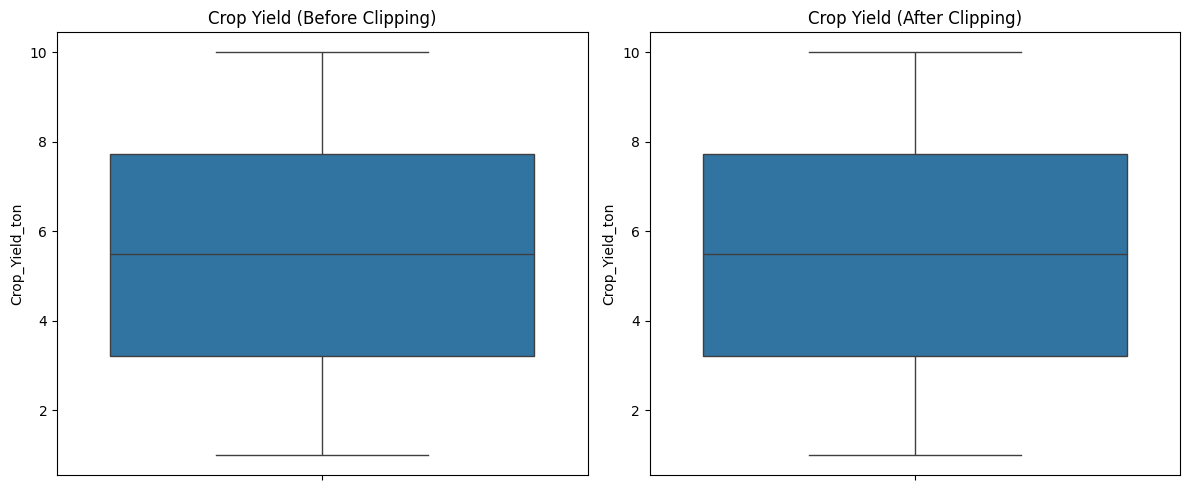

In [34]:
# Visualize before and after for Crop_Yield_ton
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=primary_data['Crop_Yield_ton'])
plt.title('Crop Yield (Before Clipping)')
plt.subplot(1, 2, 2)
sns.boxplot(y=merged_data['Crop_Yield_ton'])
plt.title('Crop Yield (After Clipping)')
plt.tight_layout()
plt.show()

**Observation**: No missing values detected, consistent with Assignment 2 findings.

**Observation**: Outliers in `Crop_Yield_ton` (e.g., extremely low/high values) are clipped to IQR bounds, reducing skewness while preserving data integrity. Similar clipping is applied to fertilizer and pesticide usage.

### 3.3 Categorical Encoding
The merged dataset has two categorical columns:
- `Crop_Type`: (Wheat, Soybean, Corn, Rice) – requires one-hot encoding for modeling.
- `Seasonal_Factor`: (Low, Medium, High) – requires ordinal encoding due to its ordered nature.

We encode these to prepare for modeling.

In [35]:
# One-hot encoding for Crop_Type
merged_data = pd.get_dummies(merged_data, columns=['Crop_Type'], prefix='Crop') 

In [36]:
# Ordinal encoding for Seasonal_Factor
seasonal_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
merged_data['Seasonal_Factor'] = merged_data['Seasonal_Factor'].map(seasonal_mapping)

In [37]:
print("\nColumns After Encoding:")
print(merged_data.dtypes)


Columns After Encoding:
Farm_ID                       int64
Soil_pH                     float64
Soil_Moisture               float64
Temperature_C               float64
Rainfall_mm                 float64
Fertilizer_Usage_kg         float64
Pesticide_Usage_kg          float64
Crop_Yield_ton              float64
Sustainability_Score        float64
Market_ID                     int64
Market_Price_per_ton        float64
Demand_Index                float64
Supply_Index                float64
Competitor_Price_per_ton    float64
Economic_Indicator          float64
Weather_Impact_Score        float64
Seasonal_Factor               int64
Consumer_Trend_Index        float64
Crop_Corn                      bool
Crop_Rice                      bool
Crop_Soybean                   bool
Crop_Wheat                     bool
dtype: object


**Observation**: `Crop_Type` is split into binary columns (e.g., Crop_Wheat), and `Seasonal_Factor` is mapped to numerical values (1, 2, 3), making the dataset fully numerical for modeling.

## 4. Feature Engineering
We derive five new features to enhance predictive modeling, focusing on resource efficiency, environmental impact, and interaction effects. Each feature is explained below.

### 4.1 Feature 1: Yield_per_Fertilizer
**Logic**: Measures efficiency of fertilizer use (tons of yield per kg of fertilizer). Higher values indicate better resource utilization, aligning with the goal of reducing resource use by 15%.
merged_data['Yield_per_Fertilizer'] = merged_data['Crop_Yield_ton'] / merged_data['Fertilizer_Usage_kg']